In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data installation and exploration

In [6]:
# Import library for dataset
from ucimlrepo import fetch_ucirepo  

# Download dataset from UCI ML repository
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Asign data to pandas dataframes 
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

Firstly, we should comprehend the datasets structure: 

In [7]:
print(X.shape) #Number of rows and columns


(253680, 21)


The dataset contains 253,680 rows and 21 columns, indicating a large sample size suitable for statistically significant analysis. Each row corresponds to an individual, and each column represents either a feature or demographic information. This scale of data suggests that clustering algorithms could potentially identify meaningful subgroups within the diabetic and prediabetic populations.

Given the large dataset size, computational efficiency becomes crucial, especially when applying the clustering algorithms. Mini-batch versions of algorithms like K-Means could be beneficial for handling this volume of data effectively.

In [8]:
print(X.head(1)) #first and last entries
print(X.tail(1))

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1            0        5   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        18        15         1    0    9          4       3  

[1 rows x 21 columns]
        HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
253679       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
253679                     1             1       1        0  ...   

        AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  \
253679              1            0        2         0         0         0   

        Sex  Age  Education  Income  
253679    0    9          6       2  

[1 rows x 21 columns]


The `head` and `tail` outputs reveal example data values, which give an initial impression of how the variables are populated. Binary variables (like `HighBP`, `CholCheck`, `PhysActivity`) use 0/1 encoding, while other integer-coded variables reflect ordinal categories.

The examples confirm the presence of categories within the ranges expected after following the dataset documentation, e.g., `GenHlth` values ranging from 1 to 5, representing levels from "excellent" to "poor" health. Observing that each variable follows its expected format strengthens confidence in the data's readiness for analysis, particularly for clustering where consistent formatting is crucial.

In [9]:
print(X.info()) # columns characteristics and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

Output from `X.info()` shows that all columns are of type `int64`, suggesting a uniform data structure with no float types or other non-numeric data that might require additional handling.

No missing values are detected, which aligns with the dataset's description and simplifies preprocessing by removing the need for imputation or data cleaning steps to handle missing entries.

In [10]:
for column in X.columns:
    print(f"Columna: {column}")
    print(X[column].unique())
    print("-" * 40)

Columna: HighBP
[1 0]
----------------------------------------
Columna: HighChol
[1 0]
----------------------------------------
Columna: CholCheck
[1 0]
----------------------------------------
Columna: BMI
[40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
----------------------------------------
Columna: Smoker
[1 0]
----------------------------------------
Columna: Stroke
[0 1]
----------------------------------------
Columna: HeartDiseaseorAttack
[0 1]
----------------------------------------
Columna: PhysActivity
[0 1]
----------------------------------------
Columna: Fruits
[0 1]
----------------------------------------
Columna: Veggies
[1 0]
----------------------------------------
Columna: HvyAlcoholConsump
[0 1]
----------------------------------------
Columna: AnyHealthcare

The 21 columns include binary features (e.g., `HighBP`, `Smoker`), integer-coded categorical features (e.g., `Age`, `GenHlth`), and continuous variables like BMI. The dataset also incorporates a range of health behaviors, physical and mental health indicators, and demographic variables. This variety allows for a holistic approach to clustering that considers physical health, lifestyle, and socioeconomic factors together.

**Variable Insights**:
  - **Binary Features**: The binary features include indicators of health behaviors (e.g., `Smoker`, `PhysActivity`), health status (e.g., `HighBP`, `HeartDiseaseorAttack`), and healthcare accessibility (e.g., `AnyHealthcare`, `NoDocbcCost`). These variables provide a clear delineation of participants’ lifestyle and health status, which may help differentiate clusters based on lifestyle or chronic health conditions. For binary variables, the unique value check confirms that each uses a consistent 0/1 encoding. This consistency ensures that these features are immediately ready for use in clustering without further preprocessing.
  - **Categorical and Ordinal Variables**: Variables such as `GenHlth`, `MentHlth`, `PhysHlth`, `Education`, and `Income` are encoded as integers. For example, `GenHlth` ranges from 1 to 5, reflecting self-reported health levels, while `Education` and `Income` use progressive scales that represent education level and income brackets. It may be beneficial to explore the distribution within these variables to confirm whether the encoding reflects realistic distributions or if skewness exists that may affect clustering. Other features, such as `GenHlth` (1–5), `Education` (1–6), `Income` (1–8), and `Age` (1–13), have distinct ordinal levels, making them compatible with integer encoding for clustering. For instance, the `Age` variable’s 13-level scale allows for segmentation by age group, while `Income` provides socioeconomic context that may be important for identifying clusters with similar backgrounds.

  - **Continuous Feature (BMI)**: BMI appears to be the primary continuous variable and ranges from 12 to 98, with values mostly within typical BMI bounds, though the presence of very high values might warrant further inspection to detect any potential outliers. The unique values of `BMI` range widely, suggesting that further analysis may be needed to identify potential outliers, as extreme values could disproportionately affect clustering. Continuous features like BMI can be normalized or standardized before clustering to ensure comparability with categorical and binary features.



In [11]:
# basic stats to get an idea of data spread
print("Descriptive Statistics:\n", X.describe())

Descriptive Statistics:
               HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000              

The dataset shows relatively high proportions of individuals with lifestyle and health risk factors, such as HighBP and HighChol, with both averaging around 42-43%. This suggests a significant portion of the population faces hypertension and cholesterol-related health challenges. Additionally, nearly half of the individuals report being smokers (44%), which may contribute to the observed high prevalence of cardiovascular risk factors. The BMI has a mean of around 28.4, indicating that many individuals in this dataset fall within the overweight range, with values extending up to 98. This wide range could indicate the presence of individuals with obesity or severe weight issues.

Most individuals appear to have healthcare coverage, as indicated by the high mean value for AnyHealthcare (0.95). However, NoDocbcCost has a mean of 0.08, indicating that about 8% faced financial barriers in accessing healthcare. This disparity suggests economic or access issues that prevent a subset of the population from seeking necessary medical assistance, despite the high rate of healthcare coverage overall.

The data on MentHlth and PhysHlth show that the average number of days per month with poor mental health is about 3, while poor physical health days average around 4. These values show variability, as seen in the high standard deviations, suggesting certain individuals experience significant distress or limitations in mental or physical well-being.

The dataset’s Age distribution shows a mean age category of 8 (approximately ages 60-64), indicating a middle-aged to older adult sample. This age distribution may partially explain the higher prevalence of health conditions (like high blood pressure and high cholesterol) commonly found in older populations. Education and Income levels skew toward higher values (means of 5 and 6, respectively), suggesting a relatively educated and financially stable sample. However, variability exists, allowing for further stratification to assess how health indicators might correlate with different income and education levels.

Based on these observations, a few initial hypotheses could be formed:

- Income or Education and Health: There may be a link between socioeconomic factors (like income and education) and health outcomes, such as the prevalence of smoking or physical activity.
- Age and Health Risk Factors: Older age categories might correlate with higher rates of conditions such as high blood pressure, heart disease, or physical activity limitations.
- Mental Health and Physical Health: There could be a relationship between mental health days and physical health days, possibly indicating that poorer mental health is associated with poorer physical health.

These areas provide a foundation for targeted explorations, such as subgroup analysis by income, age, or education, to investigate potential inequalities or patterns within this population, which aligns with the "Impact" section's scope proposed at the start of this memory.

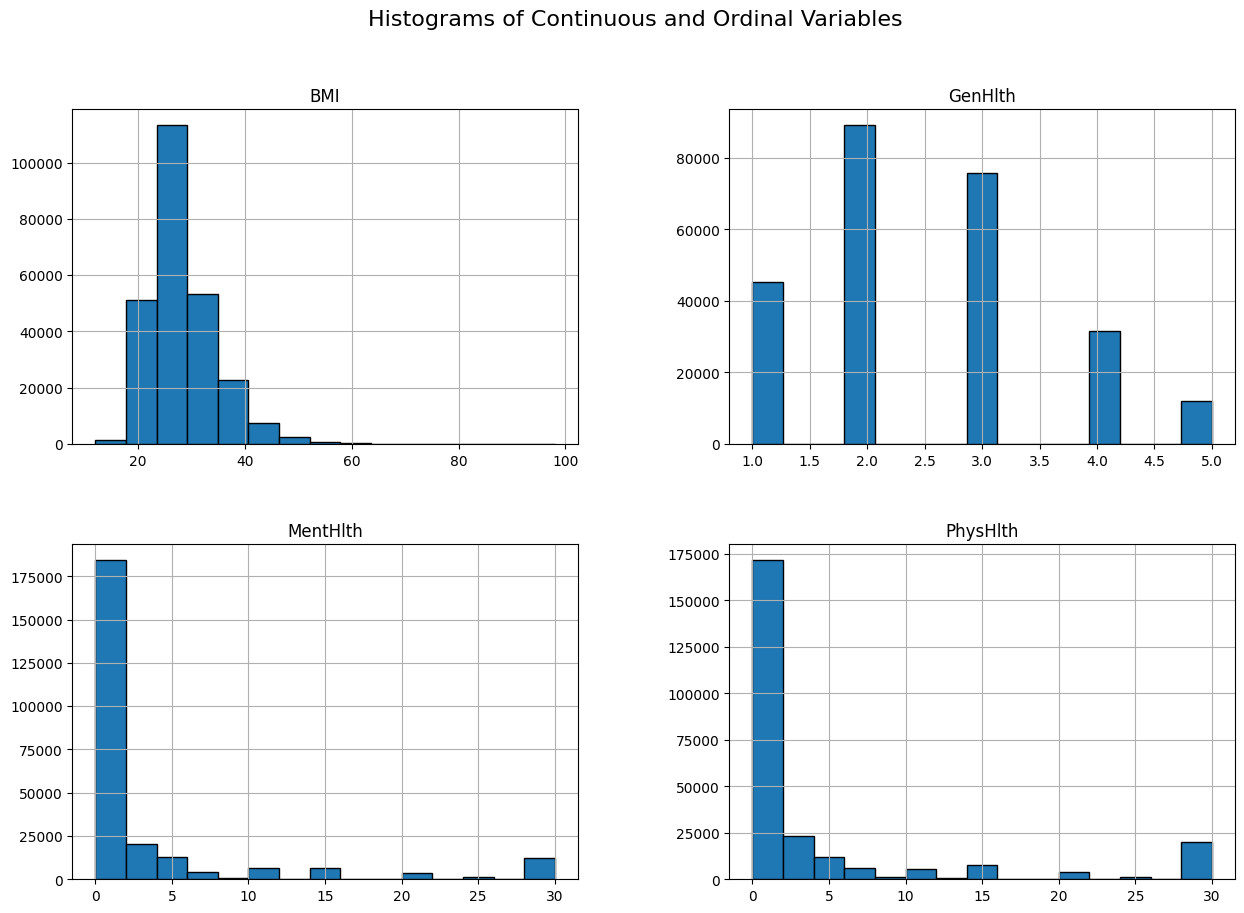

In [12]:
# histograms to check distribution of continuous and ordinal vars
continuous_ordinal_vars = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
X[continuous_ordinal_vars].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Continuous and Ordinal Variables", fontsize=16)
plt.show()

In [13]:
# bar charts for categorical variables to see counts
categorical_vars = ['Age', 'Education', 'Income']

C:\Users\sruiz\AppData\Local\Temp\ipykernel_32124\1336590646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X, x=var, ax=axes[i], palette="viridis")
C:\Users\sruiz\AppData\Local\Temp\ipykernel_32124\1336590646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X, x=var, ax=axes[i], palette="viridis")
C:\Users\sruiz\AppData\Local\Temp\ipykernel_32124\1336590646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X, x=var, ax=axes[i], palette="viridis")


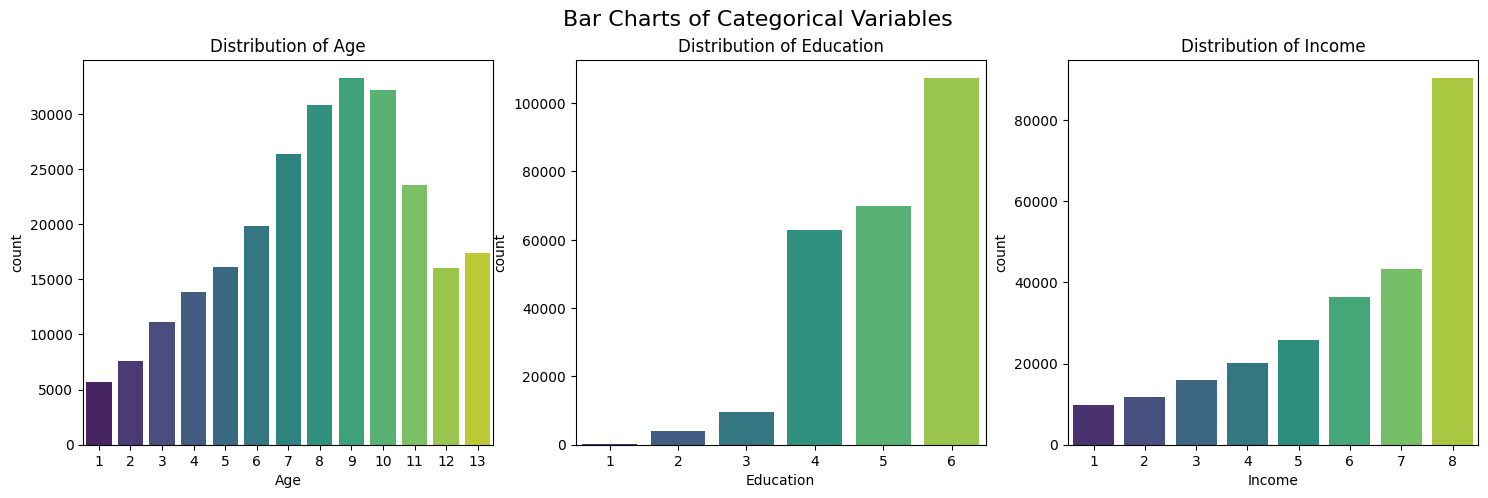

In [14]:
# plot count for each category var
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(18, 5))
for i, var in enumerate(categorical_vars):
    sns.countplot(data=X, x=var, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {var}")
plt.suptitle("Bar Charts of Categorical Variables", fontsize=16)
plt.show()

In [15]:
# correlation matrix to see relashionships among numeric features
correlation_matrix = X[continuous_ordinal_vars + categorical_vars].corr()

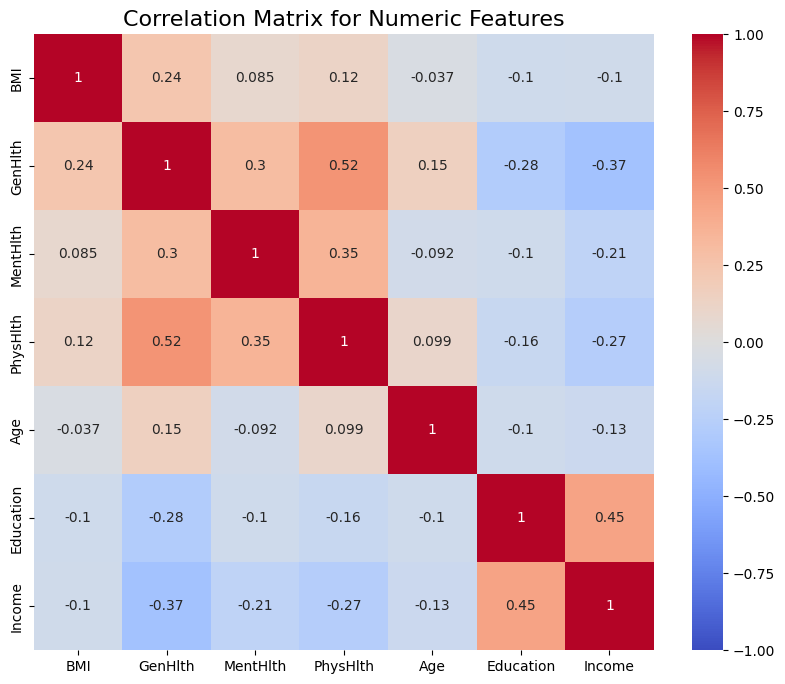

In [16]:
# plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Numeric Features", fontsize=16)
plt.show()

In [17]:
# check distribution of target variable if it’s there
if y is not None:
    print("Target Label Distribution:\n", y.value_counts())
    sns.countplot(x=y)
    plt.title("Distribution of Target Labels (Diabetes Binary)")
    plt.xlabel("Diabetes Binary (0 = Healthy, 1 = Diabetes/Prediabetes)")
    plt.ylabel("Count")
    plt.show()


Target Label Distribution:
 Diabetes_binary
0                  218334
1                   35346
Name: count, dtype: int64


ValueError: If using all scalar values, you must pass an index

In [ ]:
# scale the data to prep for pca
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[continuous_ordinal_vars + categorical_vars])

# perform pca for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:

# scatter plot to visualize pca results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y if y is not None else None, palette="viridis", alpha=0.5)
plt.title("2D PCA Visualization of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Diabetes Status" if y is not None else None)
plt.show()